In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [34]:
# 경고 끄기
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [36]:
# 데이터 불러오기
df = pd.read_csv('train.csv')

# 불필요한 열 제거
df.drop(['date'], axis=1, inplace=True)

In [37]:
df

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,목요일,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,...,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,금요일,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,...,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,토요일,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,...,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0


In [38]:
# 요일 범주형 -> 라벨인코딩 처리
le = LabelEncoder()
le.fit(df.iloc[:, 0])
df['요일']=le.transform(df.iloc[:, 0])

In [39]:
df

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,6,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,...,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,0,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,...,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,5,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,...,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,4,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,...,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0


In [40]:
# 데이터 MinMaxScaler정규화 
minmax = MinMaxScaler()
minmax.fit(df.iloc[:, :])
df.iloc[:, :]=minmax.transform(df.iloc[:, :])

In [41]:
df

,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.833333,0.015520,0.0658,0.020797,0.264706,0.024437,0.6405,0.000007,0.064389,0.013751,...,0.060900,0.511068,0.000197,0.398376,0.023032,0.356152,0.000590,0.08056,0.000000,0.000000
2,0.666667,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.500000,0.273068,0.0956,0.440354,0.280882,0.460735,0.6175,0.001690,0.026130,0.129684,...,0.457792,0.422302,0.227365,0.386475,0.745976,0.297728,0.001814,0.15540,0.000000,0.000000
4,1.000000,0.224029,0.0884,0.368802,0.310294,0.416530,0.6065,0.002690,0.025416,0.115556,...,0.387559,0.383287,0.067041,0.428410,0.278846,0.321334,0.005911,0.11412,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0.166667,0.356409,0.3678,0.532584,0.727941,0.454038,0.4950,0.006813,0.111809,0.123020,...,0.602816,0.249530,0.128151,0.566868,0.376438,0.505459,0.338341,0.14480,0.740842,0.273500
1729,0.000000,0.360848,0.3578,0.486887,0.743382,0.412859,0.4775,0.004562,0.135188,0.116213,...,0.645499,0.231212,0.141775,0.566490,0.436066,0.495279,0.321862,0.14472,0.794687,0.271100
1730,0.833333,0.318814,0.3520,0.442875,0.790441,0.415758,0.4805,0.002318,0.131764,0.101044,...,0.727384,0.208633,0.148668,0.578957,0.469269,0.456182,0.349917,0.14764,0.819581,0.265900
1731,0.666667,0.004874,0.6132,0.009903,0.837500,0.003630,0.5280,0.000145,0.130728,0.000568,...,0.001711,0.225567,0.000129,0.700227,0.002962,0.479788,0.014572,0.14268,0.025464,0.267475


In [42]:
# date 를 제외한 컬럼 (날짜 빼고 다)
# (['요일','배추_거래량(kg)', ~ , '샤인마스캇_가격(원/kg)'])
input_col_list = df.iloc[:, :].columns

# 21가지 '가격(원/kg)' 컬럼만 추출 (가격만 컬럼만 다 뽑음)
# (['배추_가격(원/kg)', '무_가격(원/kg)', ~ , '캠벨얼리_가격(원/kg)', '샤인마스캇_가격(원/kg)'])
label_col_list = df.iloc[:, 2::2].columns



In [43]:
label_col_list

Index(['배추_가격(원/kg)', '무_가격(원/kg)', '양파_가격(원/kg)', '건고추_가격(원/kg)',
       '마늘_가격(원/kg)', '대파_가격(원/kg)', '얼갈이배추_가격(원/kg)', '양배추_가격(원/kg)',
       '깻잎_가격(원/kg)', '시금치_가격(원/kg)', '미나리_가격(원/kg)', '당근_가격(원/kg)',
       '파프리카_가격(원/kg)', '새송이_가격(원/kg)', '팽이버섯_가격(원/kg)', '토마토_가격(원/kg)',
       '청상추_가격(원/kg)', '백다다기_가격(원/kg)', '애호박_가격(원/kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [44]:
window_size = 14 # 인코더 시퀀스 길이
label_len = len(label_col_list) #21
features_len = len(input_col_list) #43

In [45]:


# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (80, 10, 10) 
n = len(df) #1733
train_df = df[0:int(n*0.8)] #(1386, 44)
val_df = df[int(n*0.8):int(n*0.9)] #(173, 44)
test_df = df[int(n*0.9):] #(174, 44)
num_features = df.shape[1] #44

# x_train / y_train
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len*window_size], train_df.loc[:,label_col_list[1]]
val_X, val_y = val_df.iloc[:, :features_len*window_size], val_df.loc[:,label_col_list[1]]
test_X, test_y = test_df.iloc[:, :features_len*window_size], test_df.loc[:,label_col_list[1]]



In [46]:
from sklearn.svm import SVR, SVC 
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

배추_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.04266366073220018
R-squared:  0.7162433034628315


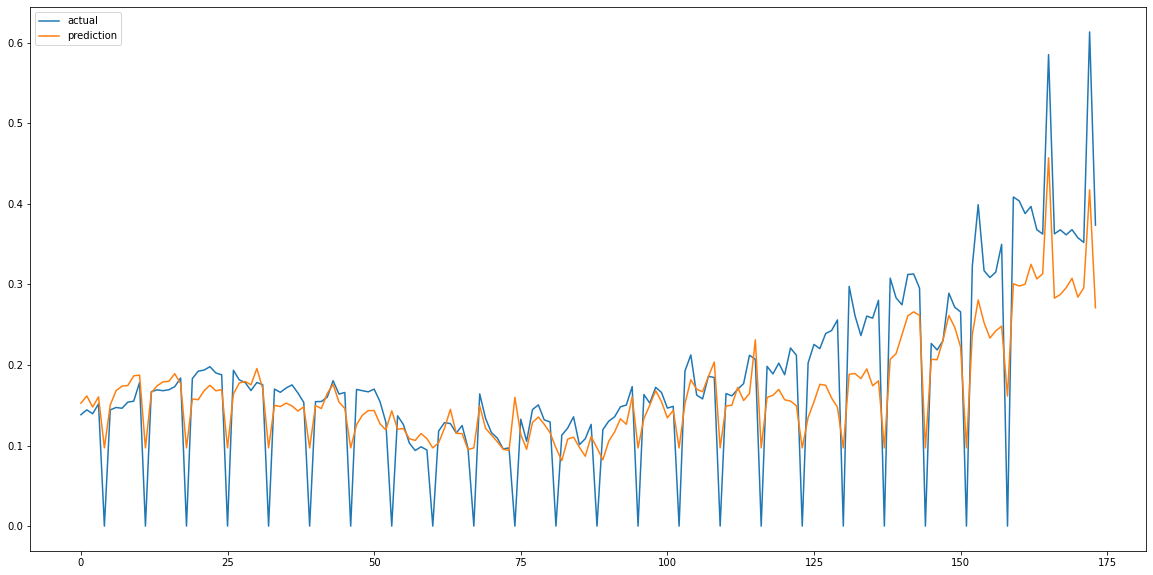

무_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.05859121666150401
R-squared:  0.8990260812321076


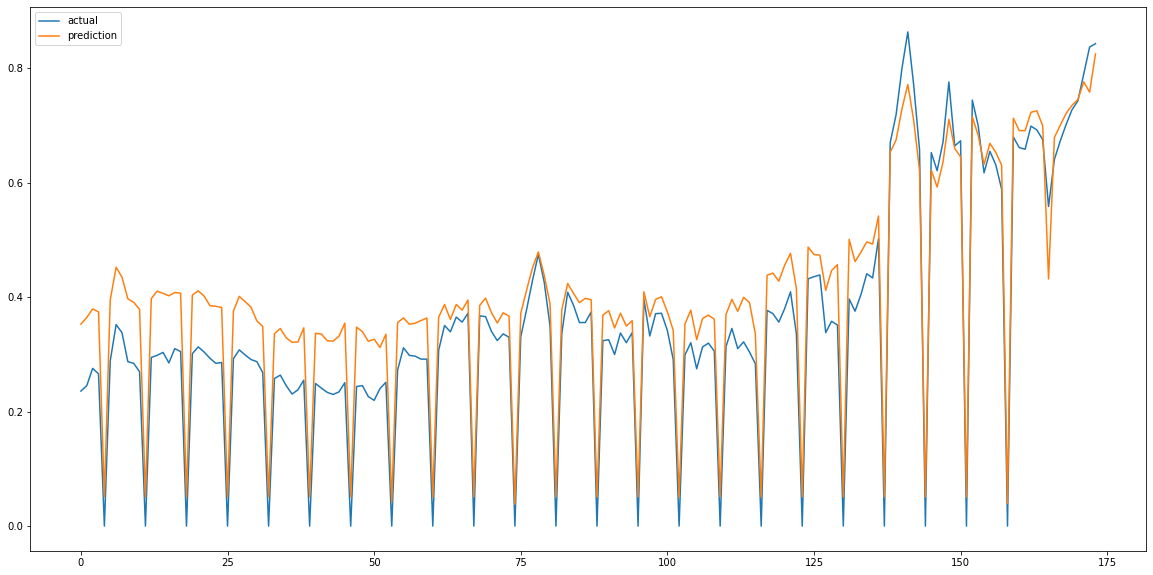

양파_가격(원/kg) 예측 모델 
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.029842270158003472
R-squared:  0.9173403936082376


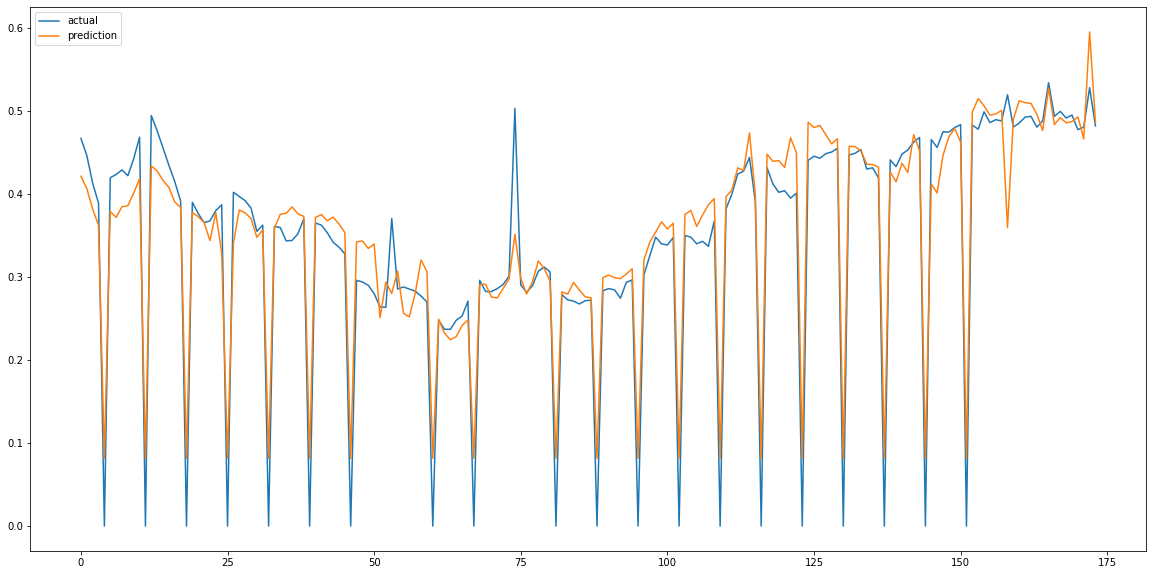

건고추_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.026355166697151582
R-squared:  0.5274899455544221


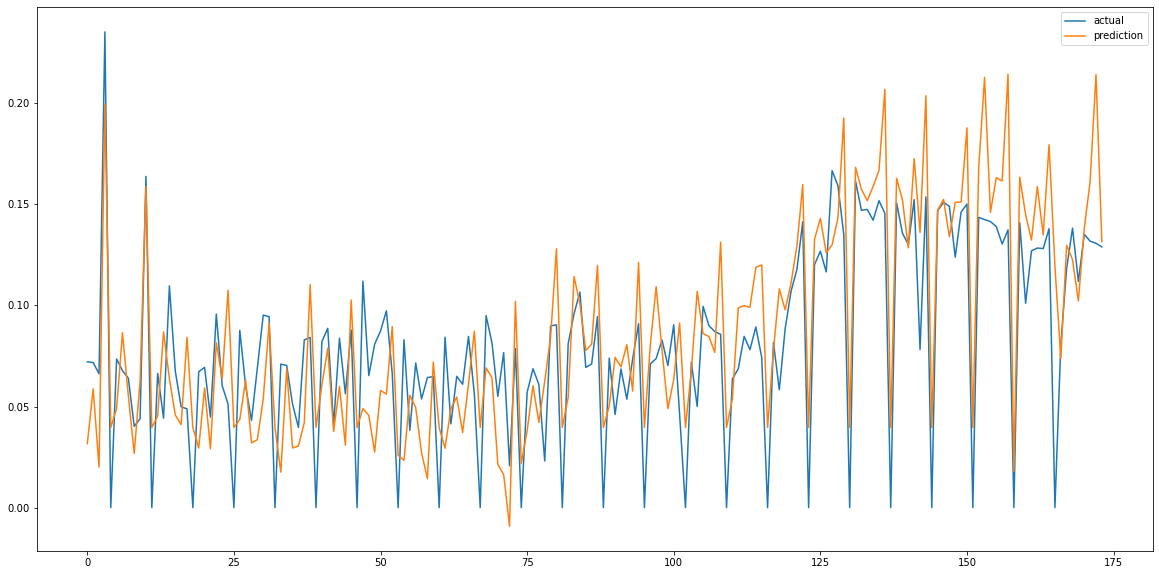

마늘_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.05934453711356769
R-squared:  0.924848615034876


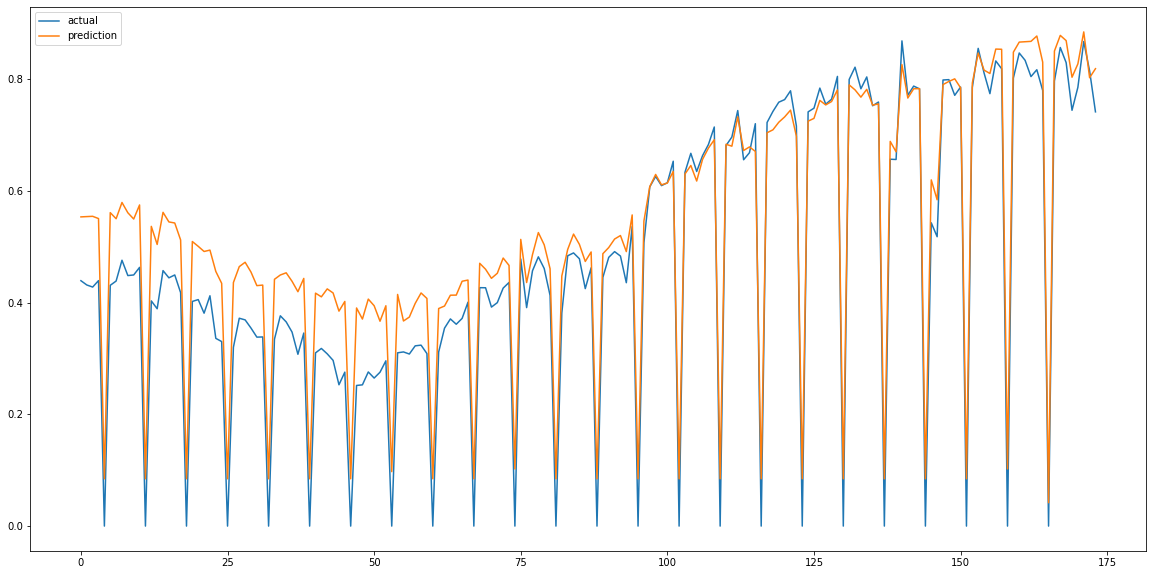

대파_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.03789263783695803
R-squared:  0.9492584970252165


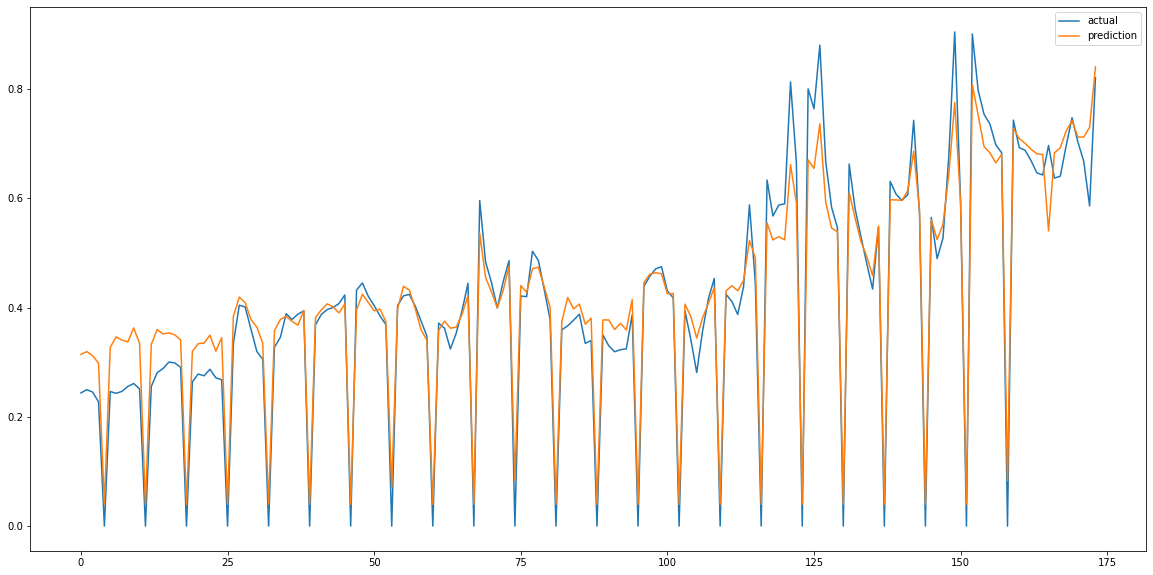

얼갈이배추_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
MAE:  0.03737066112670943
R-squared:  0.9570599391152161


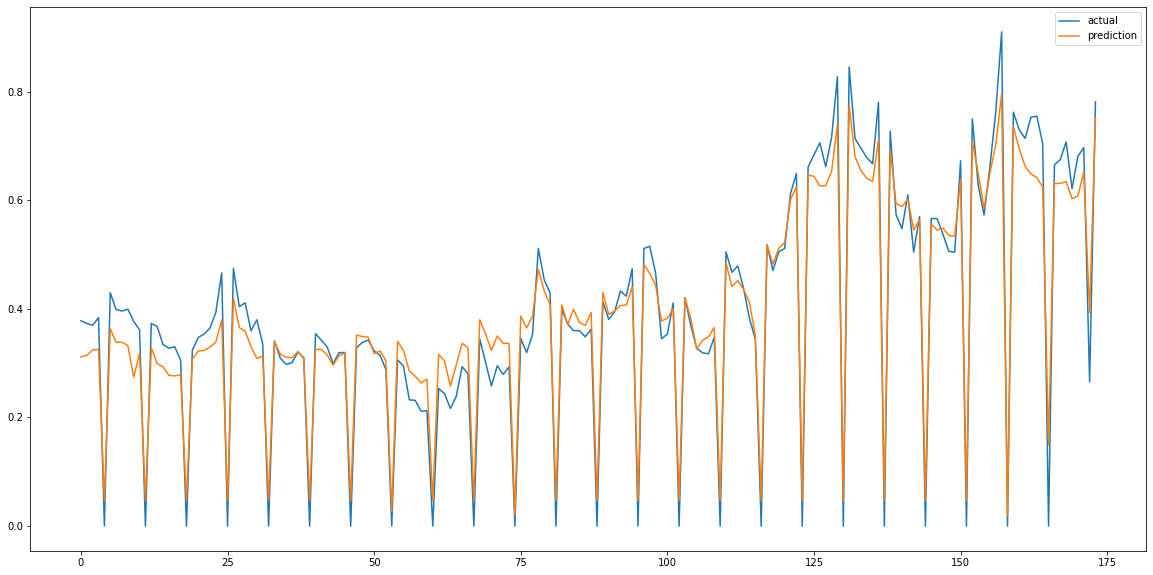

양배추_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.0616304203963525
R-squared:  0.9224531429301186


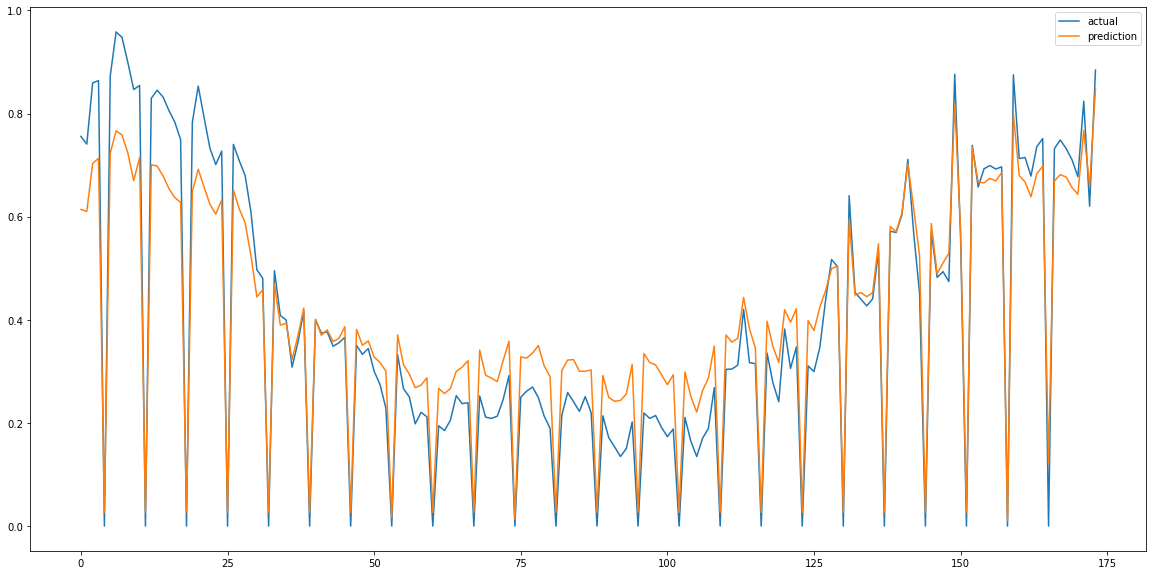

깻잎_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.05534825855838666
R-squared:  0.9084041449485942


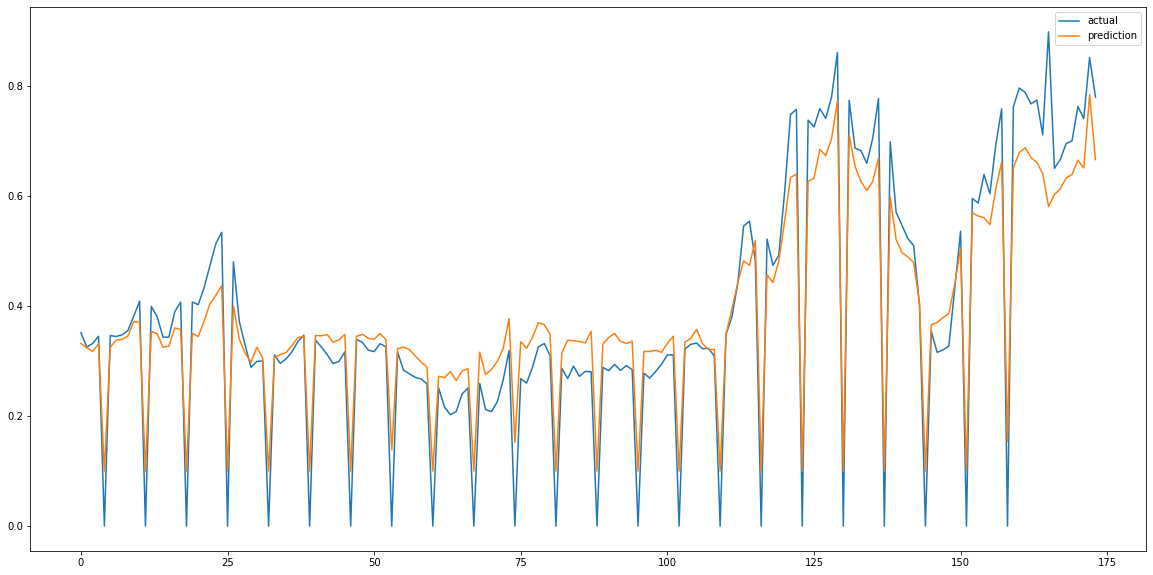

시금치_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.038401771868946624
R-squared:  0.9136216429408868


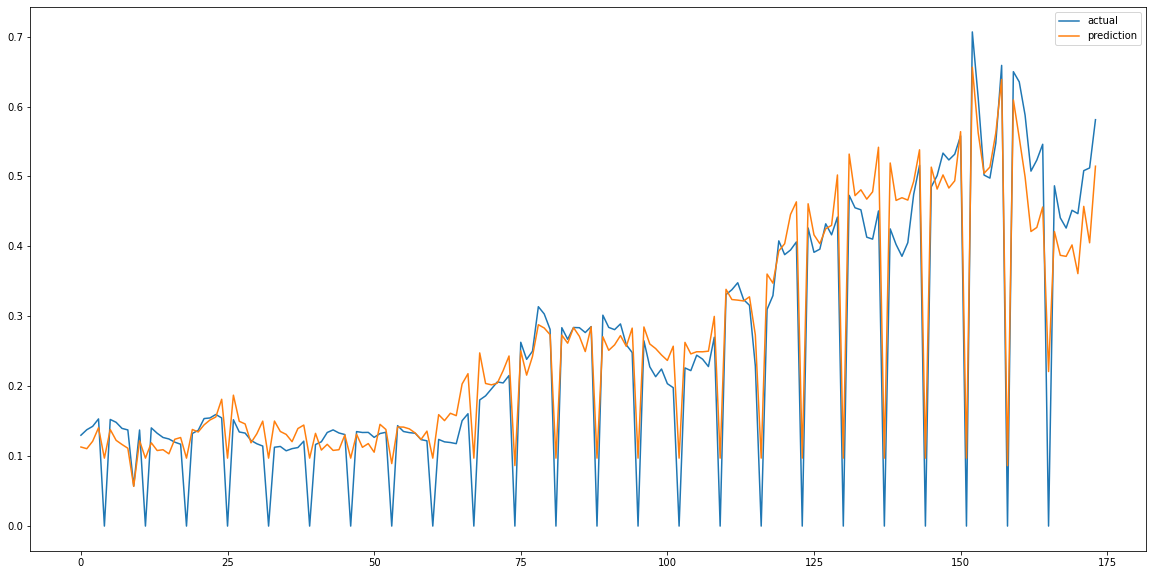

미나리_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
MAE:  0.05322669100980126
R-squared:  0.9023018375985544


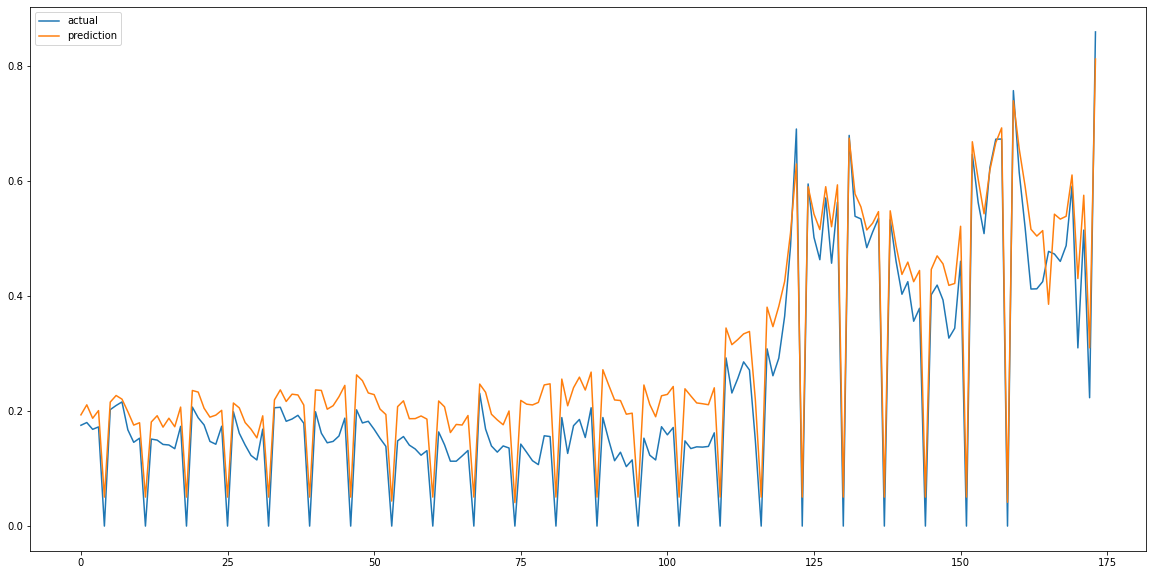

당근_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.032411915563570724
R-squared:  0.8551935668543085


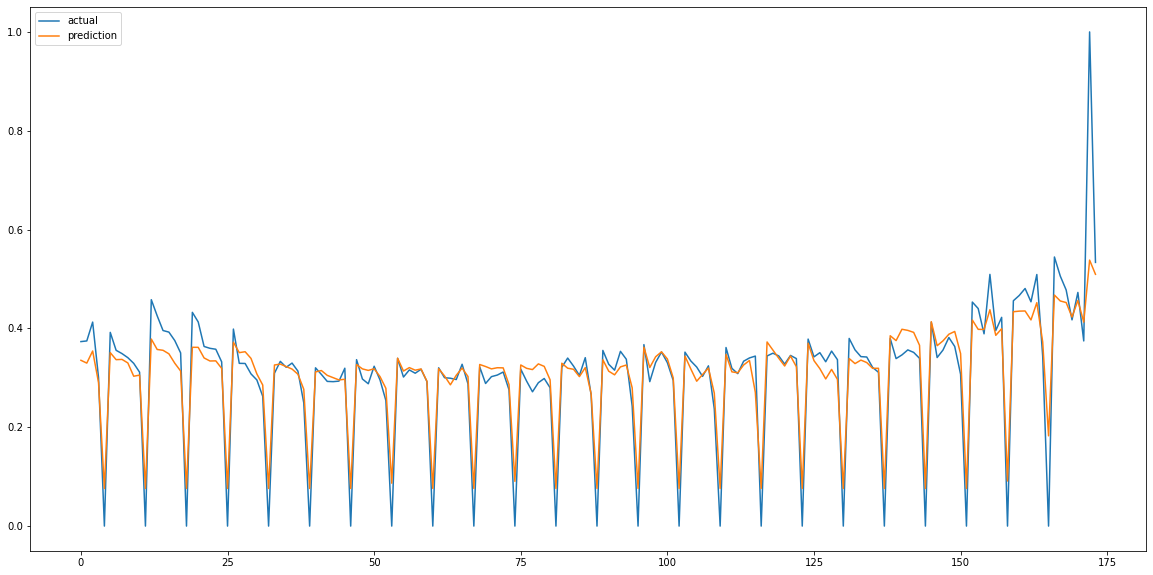

파프리카_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.03319520386408478
R-squared:  0.9387593149967353


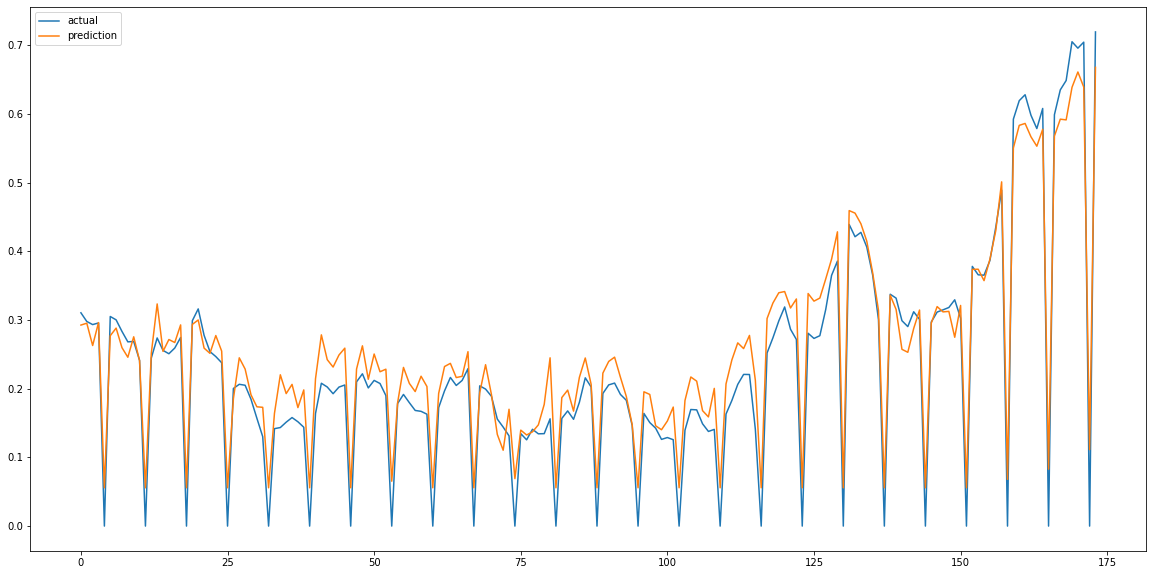

새송이_가격(원/kg) 예측 모델 
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
MAE:  0.05942816711618338
R-squared:  0.8706922251425502


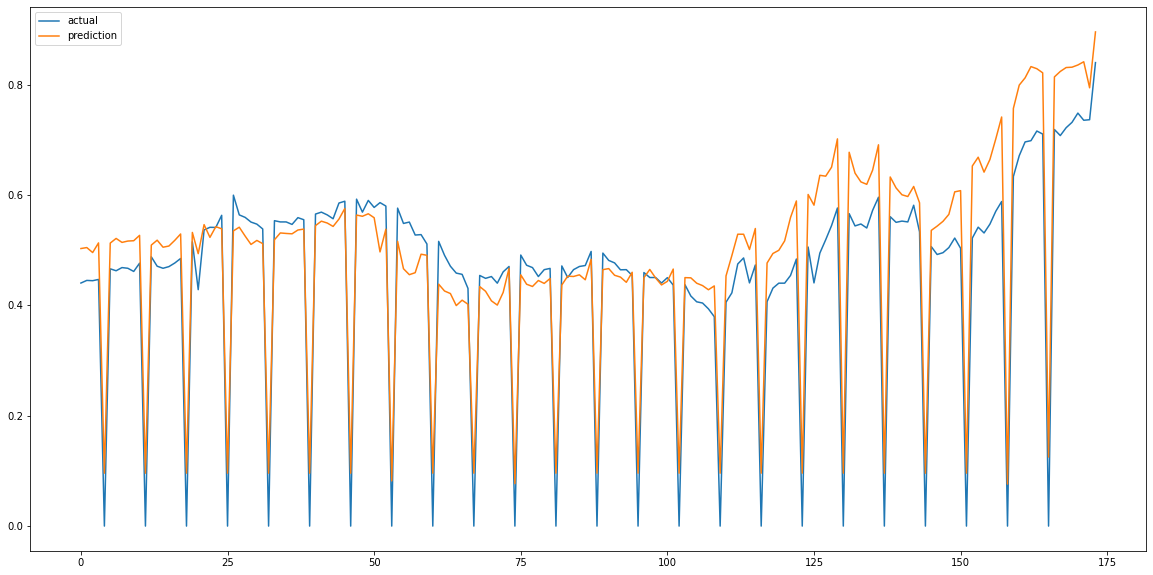

팽이버섯_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.058330574783545586
R-squared:  0.8193741359141038


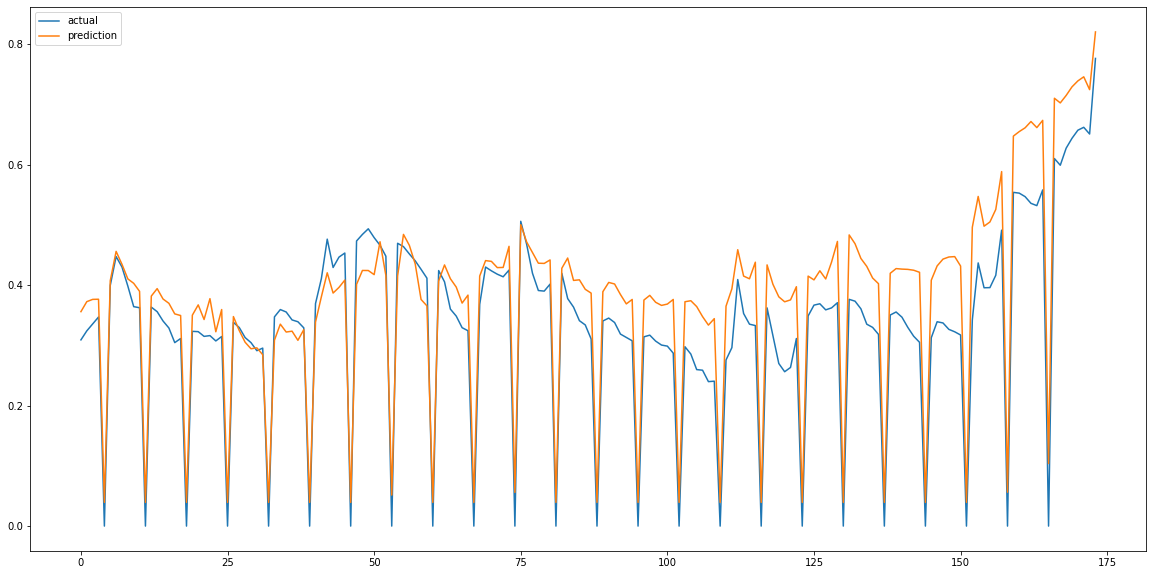

토마토_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.059346770536677876
R-squared:  0.8227415902834162


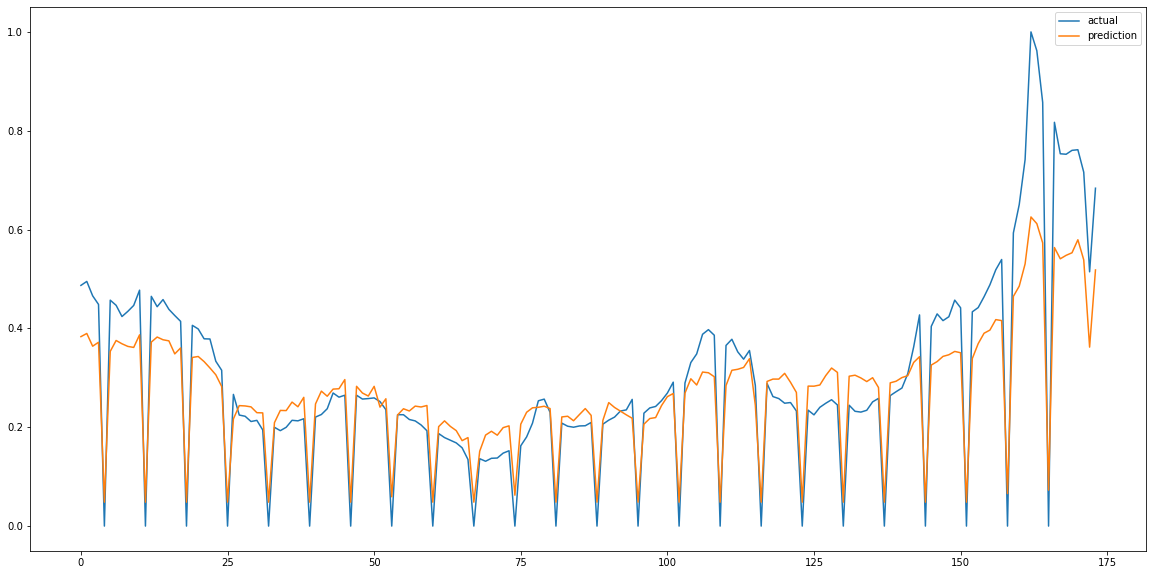

청상추_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.0565821179978386
R-squared:  0.8511032900096817


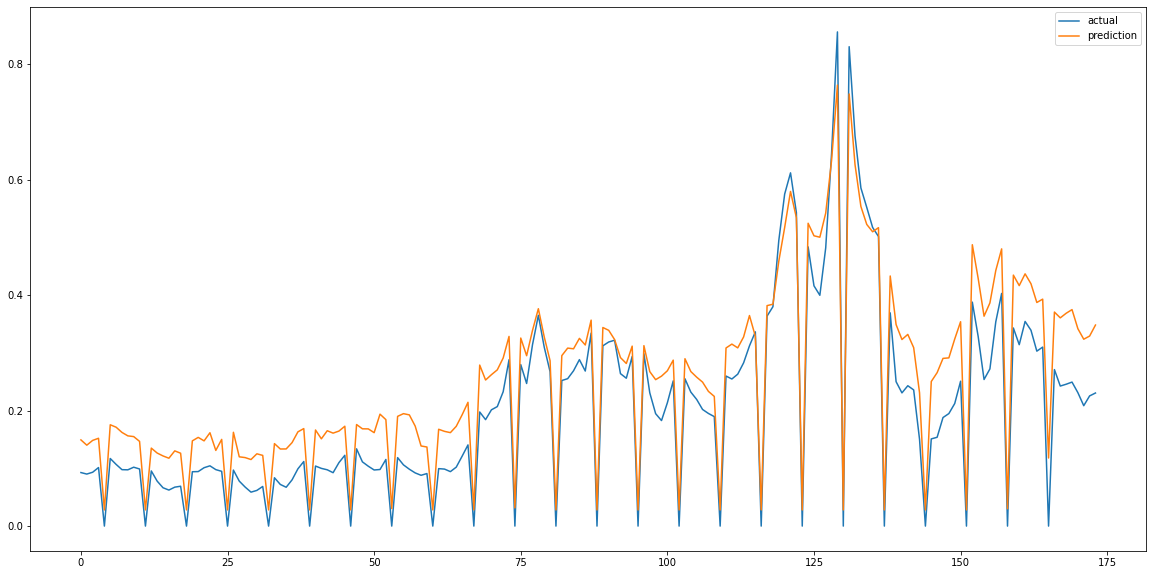

백다다기_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.05728588909989675
R-squared:  0.8725254164091647


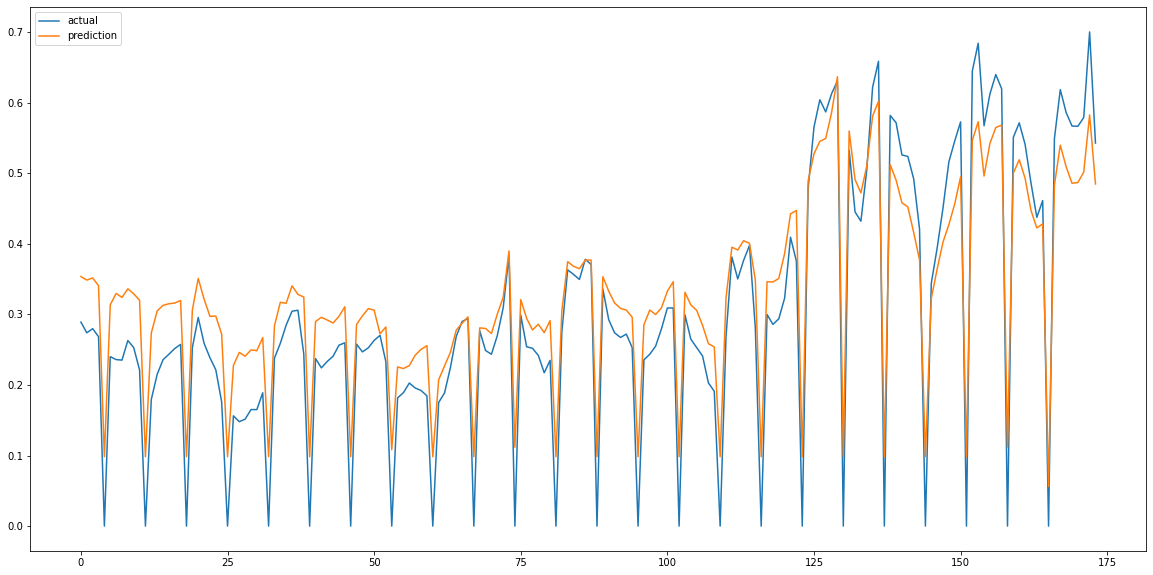

애호박_가격(원/kg) 예측 모델 
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
MAE:  0.035866072706215425
R-squared:  0.9137969636923832


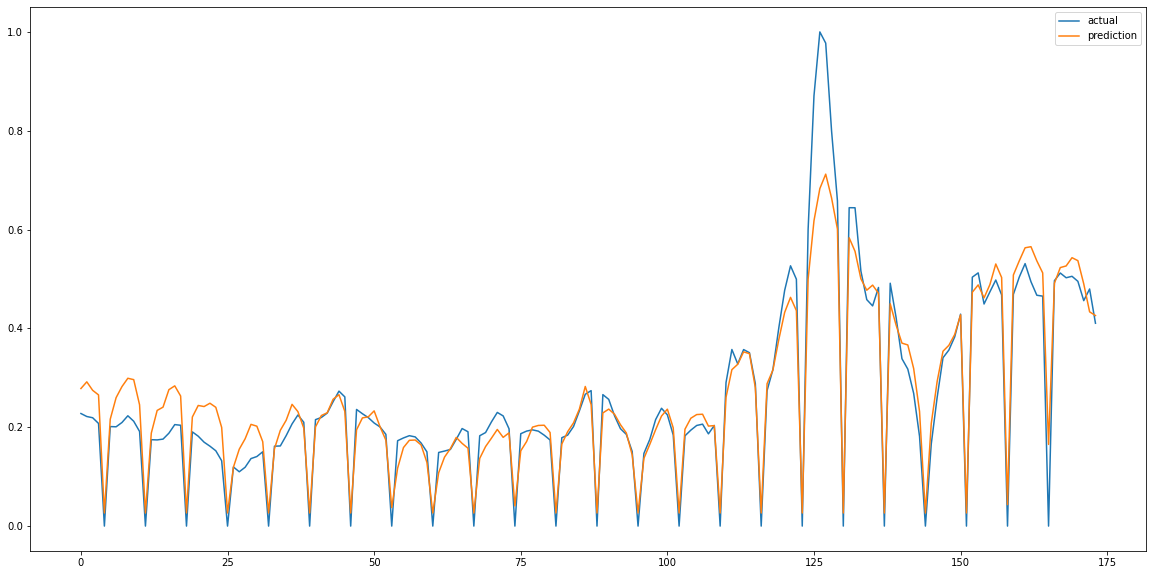

캠벨얼리_가격(원/kg) 예측 모델 
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
MAE:  0.027718727972452964
R-squared:  0.8533549742288247


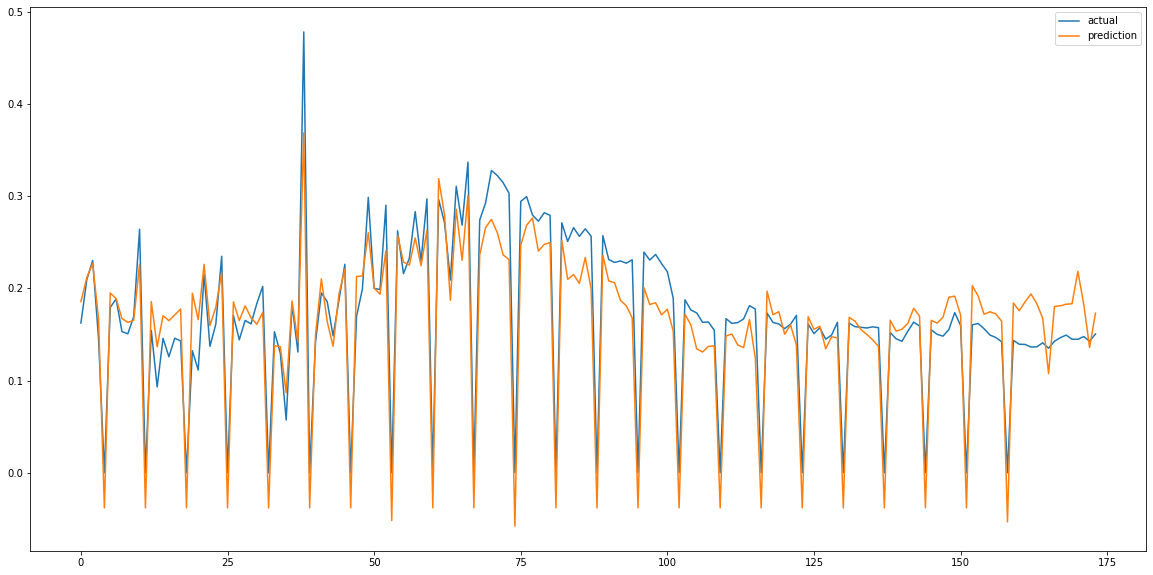

샤인마스캇_가격(원/kg) 예측 모델 
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
MAE:  0.053779006212465376
R-squared:  0.9440454743098647


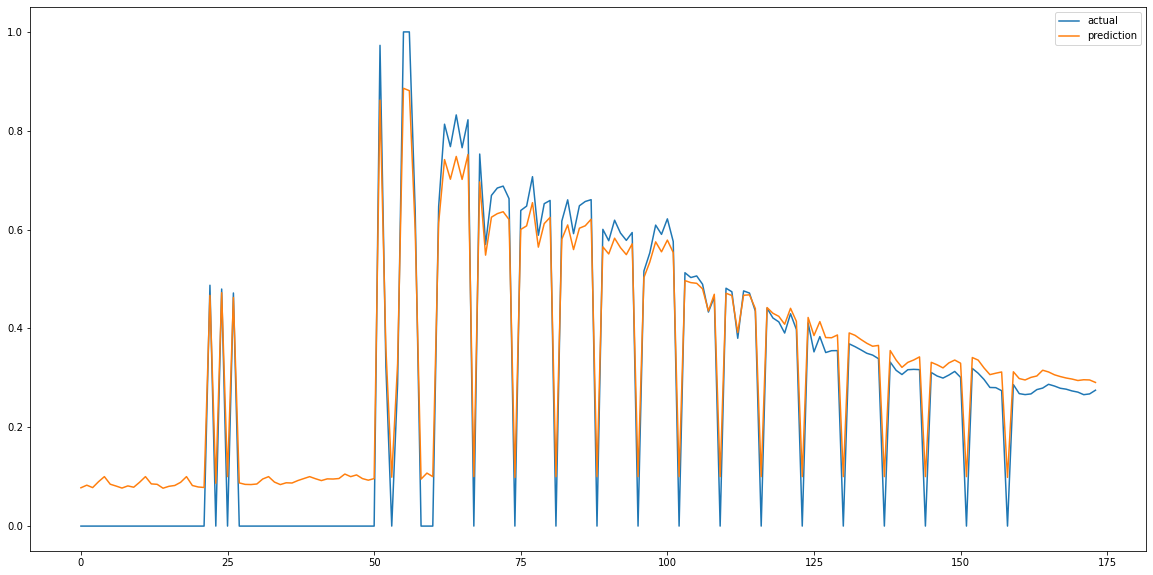

In [58]:
for col in label_col_list:
    print("="*100)
    print("{0} 예측 모델 ".format(col))
    print("="*100)
    
    train_X, train_y = train_df.iloc[:, :features_len*window_size], train_df.loc[:,col]
    val_X, val_y = val_df.iloc[:, :features_len*window_size], val_df.loc[:,col]
    test_X, test_y = test_df.iloc[:, :features_len*window_size], test_df.loc[:,col]
    
    svm_clf=SVR(kernel='linear')
    # best_params_을 이용하여 최적의 파라미터 확인
    best_params_ = svm_param_selection(train_X, train_y.values.ravel(), 10)

    # 최적의 파라미터로 학습
    clf = SVR(C= 1000, gamma= 0.001)
    clf.fit(train_X, train_y.values.ravel())



    # 추론
    svm_pred=clf.predict(test_X)

    # 평가(MAE)
    socre = mean_absolute_error(test_y, svm_pred)
    print('MAE: ', socre)

    # 평가(r2_score)
    score = r2_score(test_y, svm_pred)
    #r2_score(train_X, train_y)
    #score = clf.score(train_X, train_y)
    print('R-squared: ', score)



    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))

    plt.plot(np.array(test_y), label='actual')
    plt.plot(svm_pred, label='prediction')
    plt.legend()
    plt.show()

In [47]:
# 모델
svm_clf=SVR(kernel='linear')

In [48]:
# 하이퍼 파라미터 튜닝(그리드 서치)
def svm_param_selection(x, y, nfolds):
    svm_parameters=[{'kernel':['rbf'],
                     'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                     'C':[0.001,0.01,1,10,100,1000] }]
    
    clf = GridSearchCV(svm_clf, svm_parameters, cv=nfolds)
    clf.fit(x, y)
    print(clf.best_params_)
    
    return clf.best_params_ # 모델 리턴

In [49]:
# best_params_을 이용하여 최적의 파라미터 확인
best_params_ = svm_param_selection(train_X, train_y.values.ravel(), 10)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [51]:
# 최적의 파라미터로 학습
clf = SVR(C= 1000, gamma= 0.001)
clf.fit(train_X, train_y.values.ravel())

SVR(C=1000, gamma=0.001)

In [52]:
# 추론
svm_pred=clf.predict(test_X)

In [53]:
# 평가(MAE)
socre = mean_absolute_error(test_y, svm_pred)
print('MAE: ', socre)

MAE:  0.05859121666150401


In [54]:
# 평가(r2_score)
score = r2_score(test_y, svm_pred)
#r2_score(train_X, train_y)
#score = clf.score(train_X, train_y)
print('R-squared: ', score)

R-squared:  0.8990260812321076


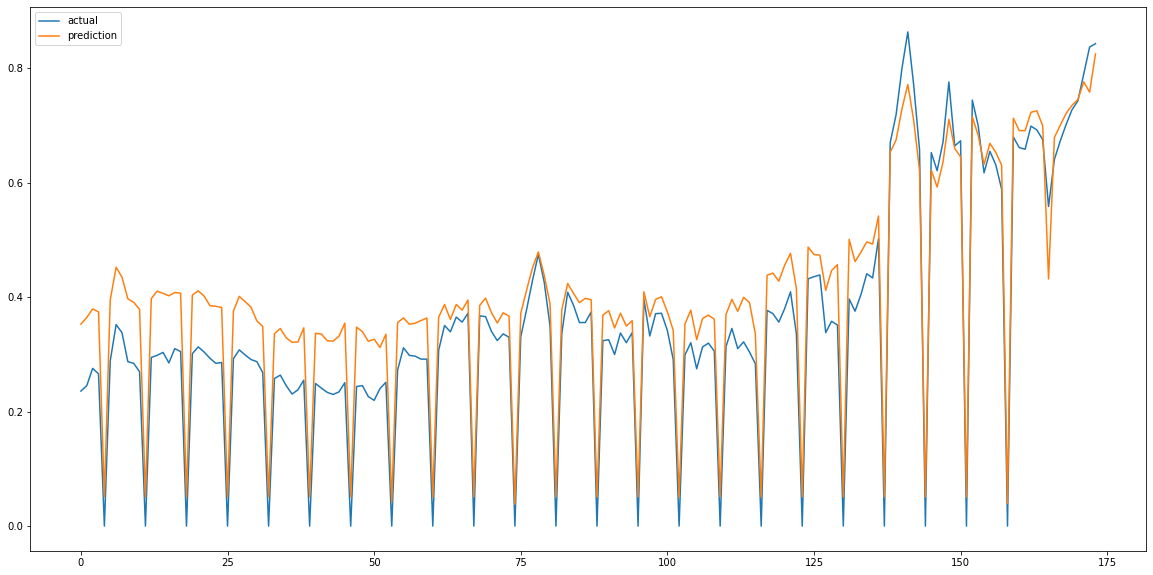

In [55]:
# 예측 데이터 시각화 
plt.figure(figsize=(20, 10))

plt.plot(np.array(test_y), label='actual')
plt.plot(svm_pred, label='prediction')
plt.legend()
plt.show()

In [28]:
type(test_y)
type(svm_pred)

numpy.ndarray